In [121]:
import pandas as pd
import seaborn as sns
import numpy as np

In [143]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])

In [144]:
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


<Axes: xlabel='timestamp', ylabel='cnt'>

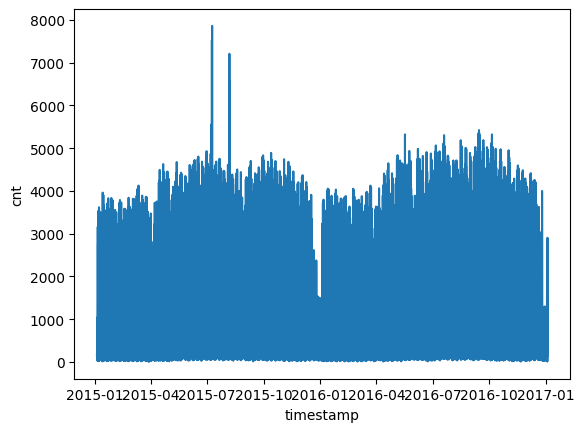

In [124]:
sns.lineplot(x='timestamp', y='cnt', data=df)

In [125]:
resample_df = df.resample('D', on='timestamp').cnt.sum()


In [126]:
resample_df = resample_df.reset_index()
resample_df.columns = ['timestamp', 'cnt']

<Axes: xlabel='timestamp', ylabel='cnt'>

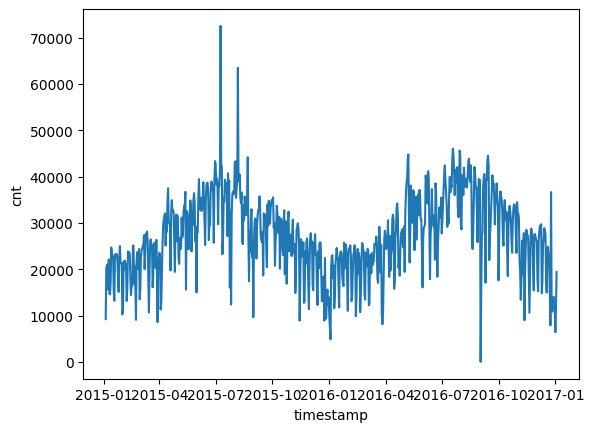

In [127]:
sns.lineplot(x='timestamp', y='cnt', data=resample_df)

In [128]:

# тут делаем ещё один столбик к ресемпле, чтобы не прыгать потом по ним
resample_df['rolling_mean'] = resample_df['cnt'].rolling(window=3).mean()

In [129]:
resample_df = resample_df.reset_index()

In [130]:
resample_df

,index,timestamp,cnt,rolling_mean
0,0,2015-01-04,9234,NaN
1,1,2015-01-05,20372,NaN
2,2,2015-01-06,20613,16739.666667
3,3,2015-01-07,21064,20683.000000
4,4,2015-01-08,15601,19092.666667
...,...,...,...,...
726,726,2016-12-30,11566,12682.000000
727,727,2016-12-31,11424,12347.333333
728,728,2017-01-01,6421,9803.666667
729,729,2017-01-02,11823,9889.333333


In [131]:
# по заданию требуется найти сглаженное значение по дню
resample_df.query("timestamp == @pd.to_datetime('2015-07-09')")

,index,timestamp,cnt,rolling_mean
186,186,2015-07-09,72504,50705.0


In [132]:
resample_df['difference'] = resample_df['cnt'] - resample_df['rolling_mean']

In [133]:
resample_df

,index,timestamp,cnt,rolling_mean,difference
0,0,2015-01-04,9234,NaN,NaN
1,1,2015-01-05,20372,NaN,NaN
2,2,2015-01-06,20613,16739.666667,3873.333333
3,3,2015-01-07,21064,20683.000000,381.000000
4,4,2015-01-08,15601,19092.666667,-3491.666667
...,...,...,...,...,...
726,726,2016-12-30,11566,12682.000000,-1116.000000
727,727,2016-12-31,11424,12347.333333,-923.333333
728,728,2017-01-01,6421,9803.666667,-3382.666667
729,729,2017-01-02,11823,9889.333333,1933.666667


In [134]:
resample_std= np.std(resample_df['difference'])

In [136]:
round(resample_std, 2)

np.float64(4558.59)

In [137]:
resample_df['upper_bound'] = resample_df['rolling_mean'] + 2.576 * resample_std

In [139]:
resample_df['lower_bound'] = resample_df['rolling_mean'] - 2.576 * resample_std

In [140]:
resample_df

,index,timestamp,cnt,rolling_mean,difference,upper_bound,lower_bound
0,0,2015-01-04,9234,NaN,NaN,NaN,NaN
1,1,2015-01-05,20372,NaN,NaN,NaN,NaN
2,2,2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
3,3,2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
4,4,2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479
...,...,...,...,...,...,...,...
726,726,2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
727,727,2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
728,728,2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
729,729,2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854


In [145]:
resample_df.query("timestamp == @pd.to_datetime('2016-09-02')")

,index,timestamp,cnt,rolling_mean,difference,upper_bound,lower_bound
607,607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
